<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/random_forest_BME2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ランダムフォレスト (random forest)
  
  [In Depth: Decision Trees and Random Forests](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb#scrollTo=hxFuYYC3G3eL)より  
  
  この例では決定木の例と異なり，scikit-learn(sklearn)を使用するので，コードは異なる．

## 決定木と過学習

分類用データを準備する．scikit-learnで4クラス・300個の二次元データを人工的に発生させる．

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

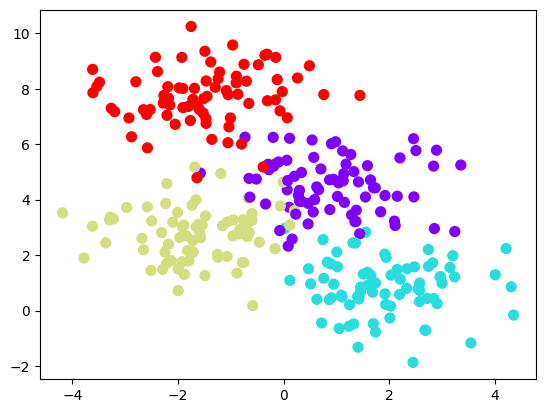

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

決定木でモデルを作成する．

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

学習結果を見てみよう．

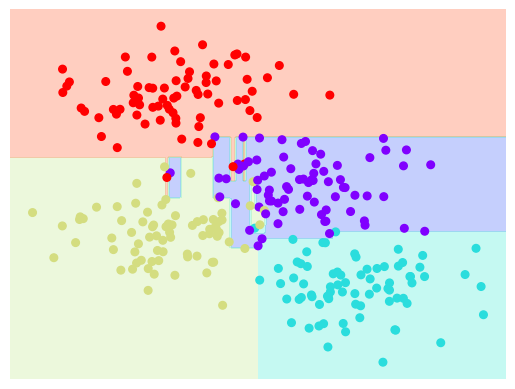

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

おおむね正しく分類されているが，一部分で明らかな過学習(恣意的に見える分類区画)があるのが分かるだろうか．決定木は深くなれば深くなるほど精度は向上するが，このような過学習が発生する．

## ランダムフォレストの適用

ここでは「バギング」(bagging)という方法を用いる．バギングはデータの一部分を抽出して学習することを繰り返し(ランダムな決定木)，最後に平均化する方法である．  
次の例では決定木の数を100として，各々で全体の8割のデータをランダムに抽出する．

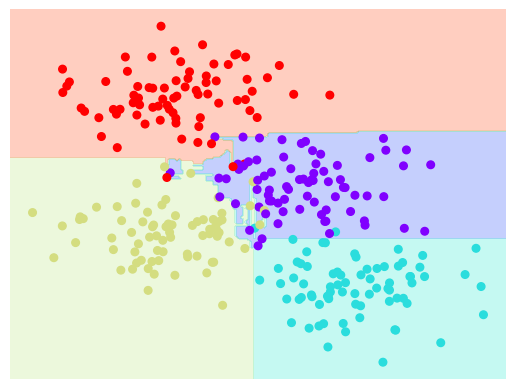

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

精度を求める．分類誤りは1個ぐらいのはず．

In [ ]:
z = bag.predict(X)
nerror = 0
for i in range(len(y)):
  if y[i] != z[i]:
    nerror += 1
print("accuracy={}".format(1-nerror/len(y)))

accuracy=0.9966666666666667
